<a href="https://colab.research.google.com/github/fcicerelli/Data_science_Primeros_pasos/blob/main/data_science_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analizando las películas en forma general

In [ ]:
import pandas as pd

notas = pd.read_csv('ratings.csv')

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ['usuarioId','peliculaId','nota','momento']

In [ ]:
notas.head()

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.head(n=10)

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [ ]:
notas.groupby(['usuarioId']).count()

,peliculaId,nota,momento
usuarioId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


In [ ]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [ ]:
notas.nota.mean()

3.501556983616962

#Visualización de los datos

<Axes: >

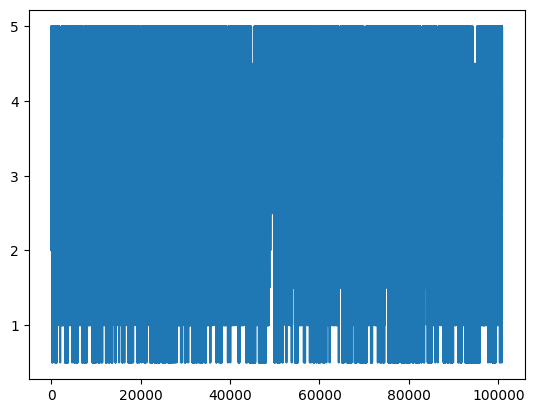

In [ ]:
notas.nota.plot()

<Axes: ylabel='Frequency'>

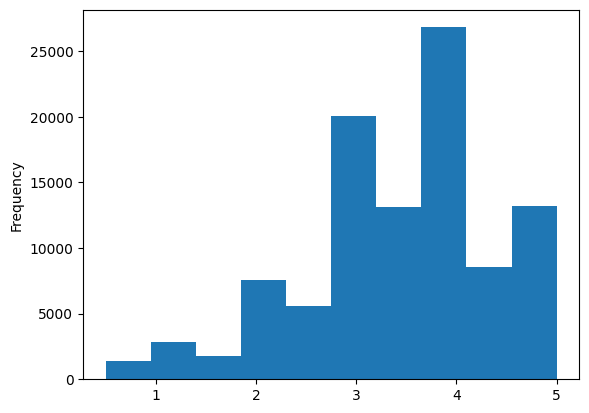

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
print("promedio = ", notas.nota.mean())
print("mediana = ", notas.nota.median())

promedio =  3.501556983616962
mediana =  3.5


In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [ ]:
notas.nota.describe().round(2)

count    100836.00
mean          3.50
std           1.04
min           0.50
25%           3.00
50%           3.50
75%           4.00
max           5.00
Name: nota, dtype: float64

<Axes: ylabel='nota'>

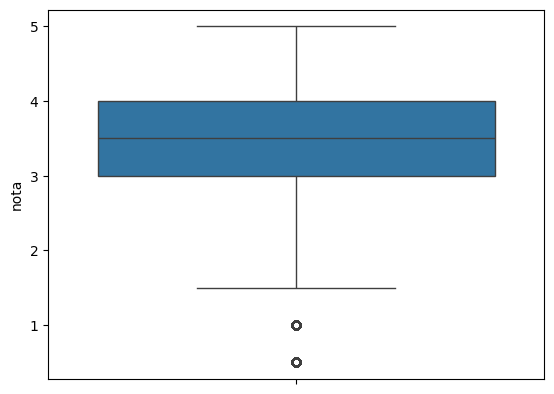

In [ ]:
import seaborn as sns
sns.boxplot(notas.nota)

#Analizando algunas notas específicas por película

In [ ]:
peliculas = pd.read_csv("movies.csv")
peliculas.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
peliculas.columns = ['peliculaId','titulo','genero']
peliculas.sample(10)

,peliculaId,titulo,genero
1540,2075,Mephisto (1981),Drama|War
3815,5345,Triumph of the Spirit (1989),Drama
8885,134248,Hot Girls Wanted (2015),Documentary
7922,95473,Dragon Ball Z: The Return of Cooler (Doragon b...,Action|Adventure|Animation
3529,4823,Serendipity (2001),Comedy|Romance
5639,27373,61* (2001),Drama
7914,95218,First Position (2011),Documentary
124,151,Rob Roy (1995),Action|Drama|Romance|War
4773,7104,1941 (1979),Comedy|War
6295,48001,"Bow, The (Hwal) (2005)",Drama|Romance


In [ ]:
notas.query("peliculaId == 1")

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
notas.query("peliculaId == 1").nota.mean()

3.9209302325581397

In [ ]:
notas.groupby('peliculaId')

In [ ]:
promedios_por_pelicula = notas.groupby('peliculaId').mean().nota
promedios_por_pelicula.head()

peliculaId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

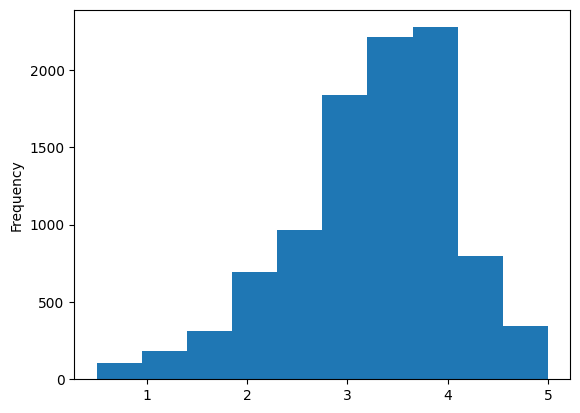

In [ ]:
promedios_por_pelicula.plot(kind="hist")

<Axes: ylabel='nota'>

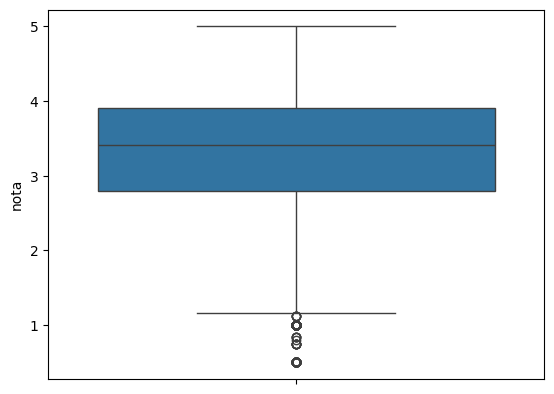

In [ ]:
import seaborn as sns
sns.boxplot(promedios_por_pelicula)

In [ ]:
promedios_por_pelicula.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

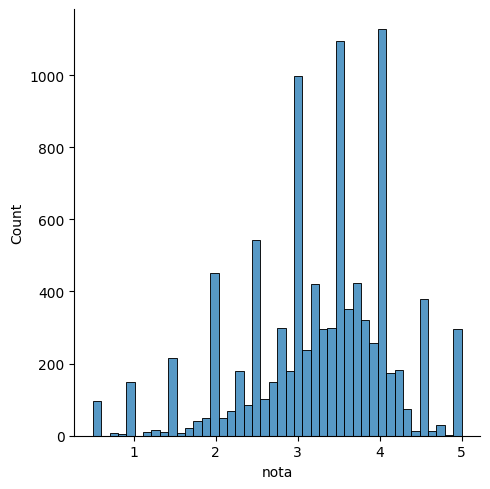

In [ ]:
sns.displot(promedios_por_pelicula)

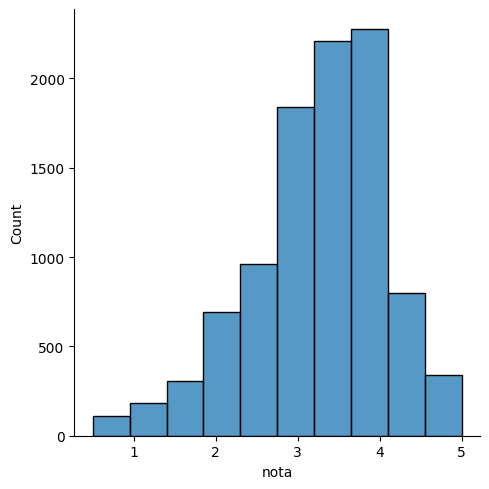

In [ ]:
sns.displot(promedios_por_pelicula,bins=10)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

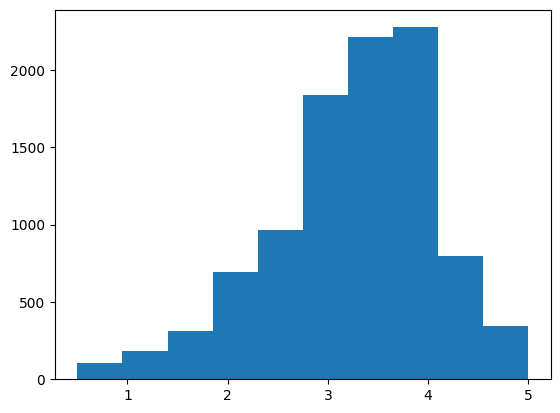

In [ ]:
import matplotlib.pyplot as plt
plt.hist(promedios_por_pelicula)

Text(0.5, 1.0, 'Histogrmama de los promedios de las películas')

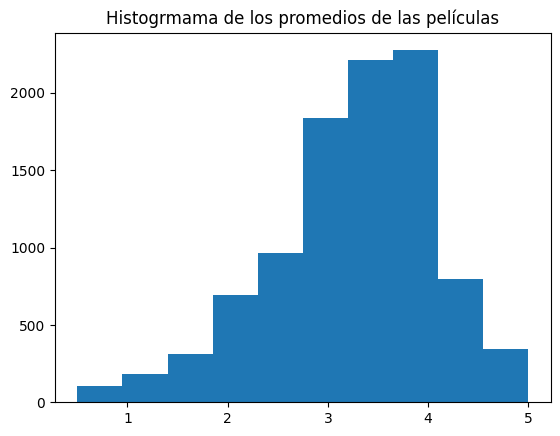

In [ ]:
plt.hist(promedios_por_pelicula)
plt.title("Histogrmama de los promedios de las películas")

<Axes: xlabel='nota'>

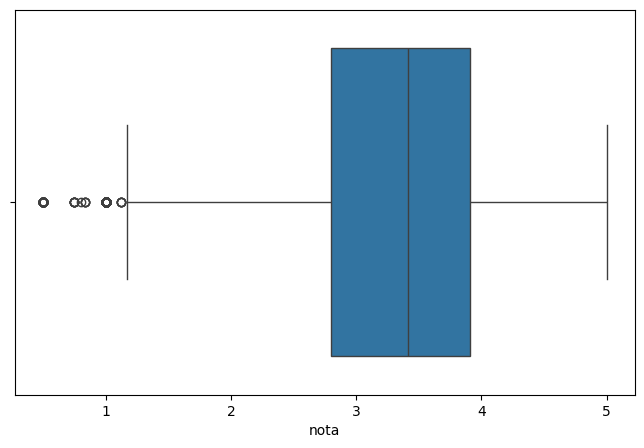

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=promedios_por_pelicula)

<Axes: ylabel='nota'>

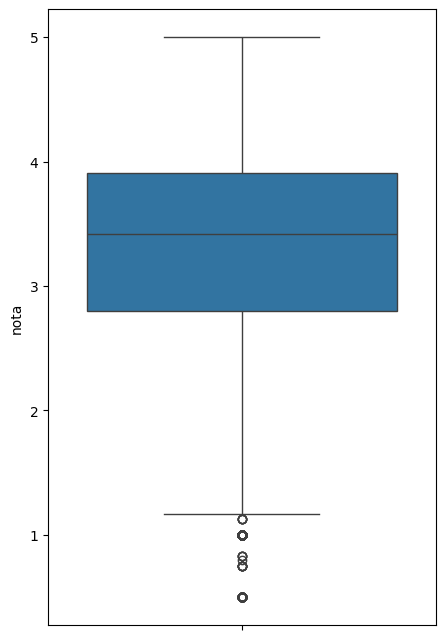

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=promedios_por_pelicula)



---



In [ ]:
import pandas as pd
tmdb = pd.read_csv('/content/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [ ]:
tmdb.original_language

0       en
1       en
2       en
3       en
4       en
        ..
4798    es
4799    en
4800    en
4801    en
4802    en
Name: original_language, Length: 4803, dtype: object

In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
tmdb.original_language.value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [ ]:
tmdb.original_language.value_counts().to_frame().reset_index()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [ ]:
contador_idiomas = tmdb.original_language.value_counts().to_frame().reset_index()
contador_idiomas.columns = ['idioma_original','total']
contador_idiomas.head()

,idioma_original,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='idioma_original', ylabel='total'>

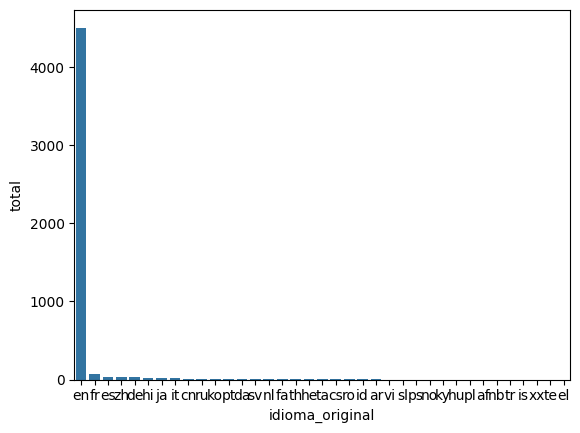

In [ ]:
sns.barplot(x='idioma_original',y='total',data=contador_idiomas)

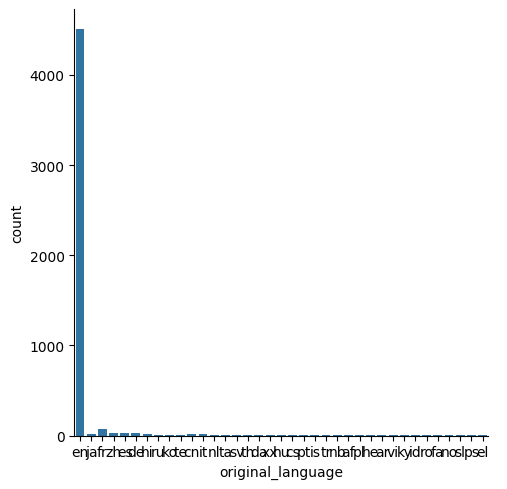

In [ ]:
sns.catplot(x="original_language",kind="count",data=tmdb)

([<matplotlib.patches.Wedge at 0x7a48c36a1090>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

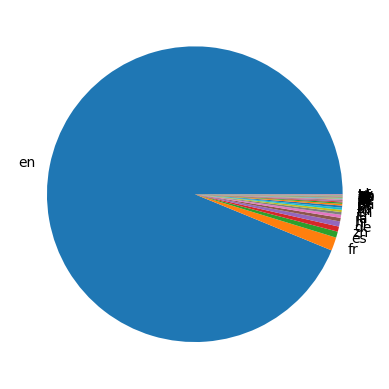

In [ ]:
import matplotlib.pyplot as plt

plt.pie(contador_idiomas.total,labels=contador_idiomas.idioma_original )

In [ ]:
total_por_idioma = tmdb.original_language.value_counts()
total_general = total_por_idioma.sum()
total_ingles = total_por_idioma.loc['en']
total_diferencia = total_general - total_ingles
print(total_general, total_ingles, total_diferencia)

4803 4505 298


In [ ]:
datos = {
    'idioma': ['ingles','otros'],
    'total': [total_ingles,total_diferencia]
}

In [ ]:
datos

{'idioma': ['ingles', 'otros'], 'total': [4505, 298]}

In [ ]:
datos = pd.DataFrame(datos)
datos

,idioma,total
0,ingles,4505
1,otros,298


<Axes: xlabel='idioma', ylabel='total'>

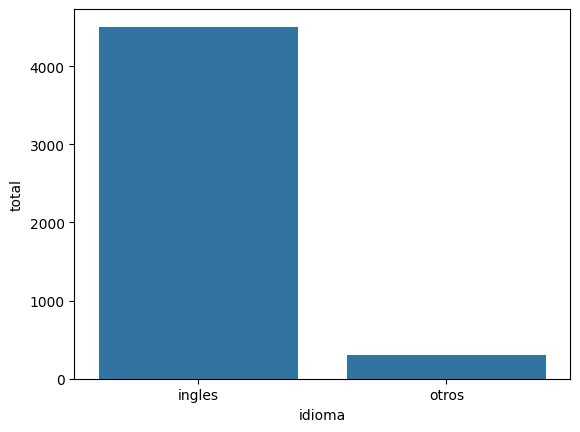

In [ ]:
sns.barplot(x="idioma",y="total",data=datos)

In [ ]:
tmdb.query("original_language != 'en'").original_language.value_counts()

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

In [ ]:
peliculas_sin_idioma_ingles = tmdb.query("original_language != 'en'")

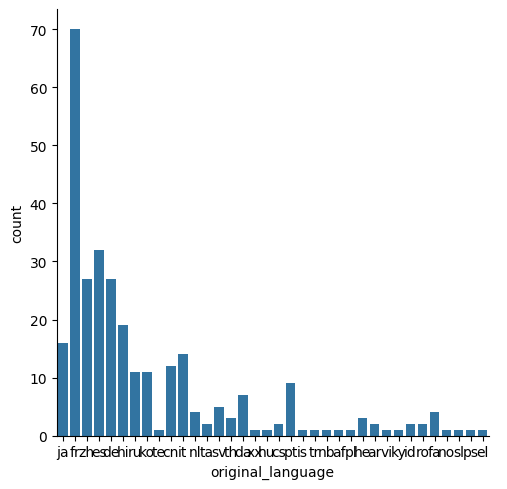

In [ ]:
sns.catplot(x='original_language', kind="count",data=peliculas_sin_idioma_ingles)

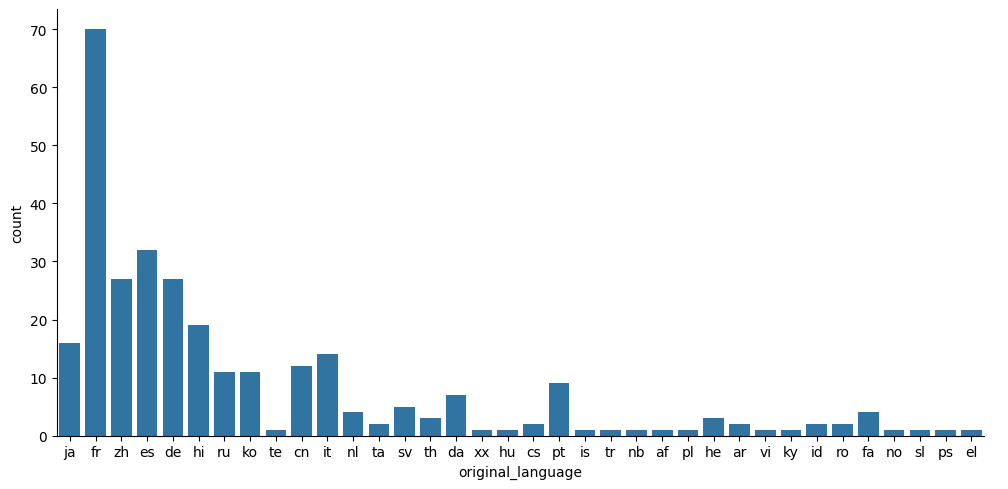

In [ ]:
sns.catplot(x = "original_language", kind="count", data = peliculas_sin_idioma_ingles, aspect = 2,
)

<Figure size 800x500 with 0 Axes>

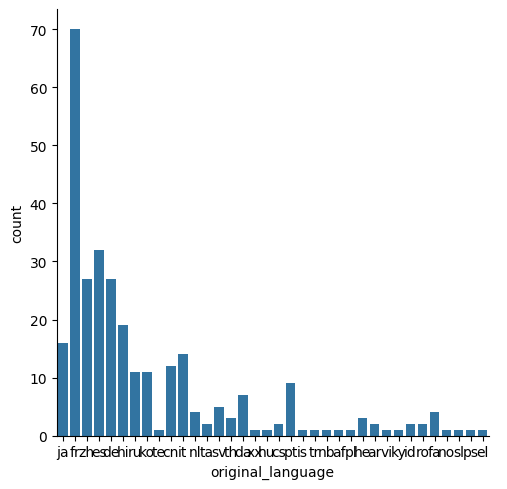

In [ ]:
plt.figure(figsize=(8,5))
sns.catplot(x='original_language', kind="count",data=peliculas_sin_idioma_ingles)

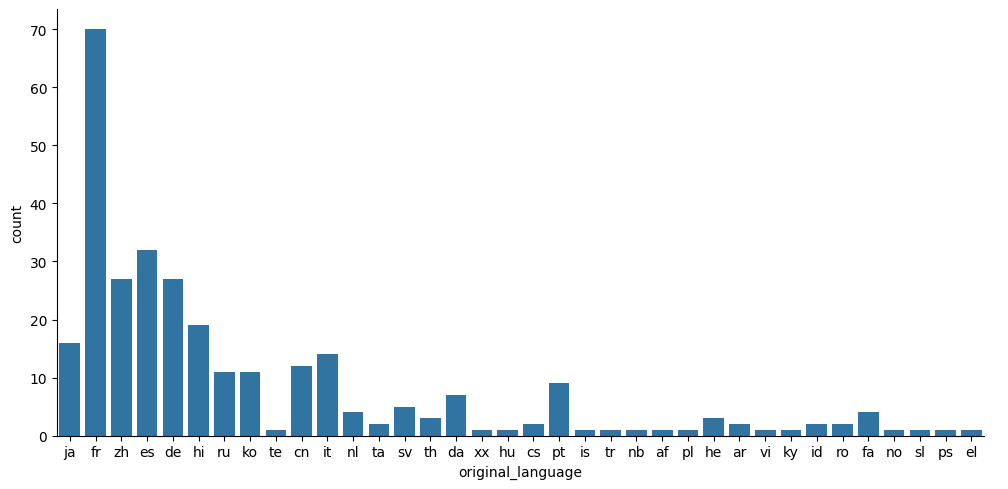

In [ ]:
sns.catplot(x='original_language', kind="count",
            data=peliculas_sin_idioma_ingles,
            aspect = 2)

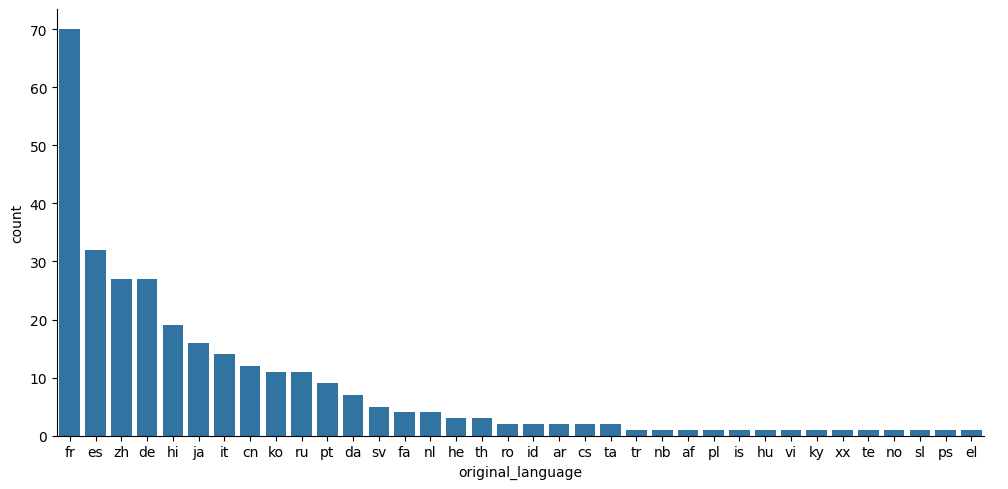

In [ ]:
total_idiomas_otras_peliculas = tmdb.query("original_language != 'en'").original_language.value_counts()

sns.catplot(x='original_language', kind="count",
            data=peliculas_sin_idioma_ingles,
            aspect = 2,
            order = total_idiomas_otras_peliculas.index)

<ipython-input-55-891b8dd2043f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='original_language', kind="count",


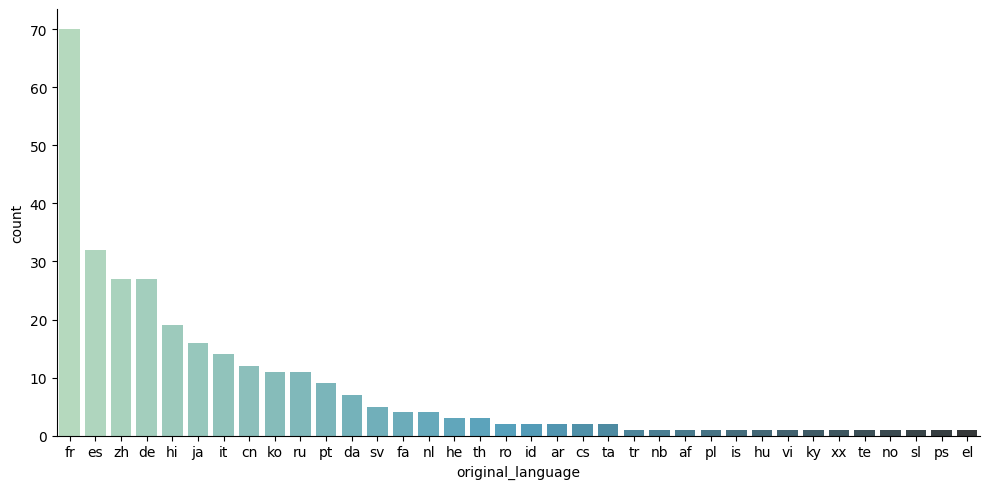

In [ ]:
sns.catplot(x='original_language', kind="count",
            data=peliculas_sin_idioma_ingles,
            aspect = 2,
            order = total_idiomas_otras_peliculas.index,
            palette = "GnBu_d")

1) Inglés es el más predominante

2) Distribución de los otros idiomas

In [ ]:
peliculas.head(2)

,peliculaId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas_toy_story = notas.query("peliculaId==1")
notas_toy_story

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
notas_jumanji = notas.query("peliculaId==2")
notas_jumanji

,usuarioId,peliculaId,nota,momento
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313
...,...,...,...,...
95102,600,2,4.0,1237764627
95965,602,2,4.0,840875851
97044,604,2,5.0,832080293
97144,605,2,3.5,1277176522


In [ ]:
print("El promedio de Toy Story es %.2f" %notas_toy_story.nota.mean())
print("El promedio de Jumanji es %.2f" %notas_jumanji.nota.mean())

El promedio de Toy Story es 3.92
El promedio de Jumanji es 3.43


In [ ]:
print("La mediana de Toy Story es %.2f" %notas_toy_story.nota.median())
print("La mediana de Jumanji es %.2f" %notas_jumanji.nota.median())

La mediana de Toy Story es 4.00
La mediana de Jumanji es 3.50


In [ ]:
import numpy as np
pelicula1 = np.append(
            np.array([2.5]*10),
            np.array([3.5]*10)
            )
pelicula2 = np.append(
            np.array([1]*10),
            np.array([5]*10)
            )

In [ ]:
print(pelicula1.mean(),pelicula2.mean())

3.0 3.0


In [ ]:
print(np.median(pelicula1),np.median(pelicula2))

3.0 3.0


<ipython-input-64-f0e18a2182df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pelicula1)
<ipython-input-64-f0e18a2182df>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pelicula2)


<Axes: ylabel='Density'>

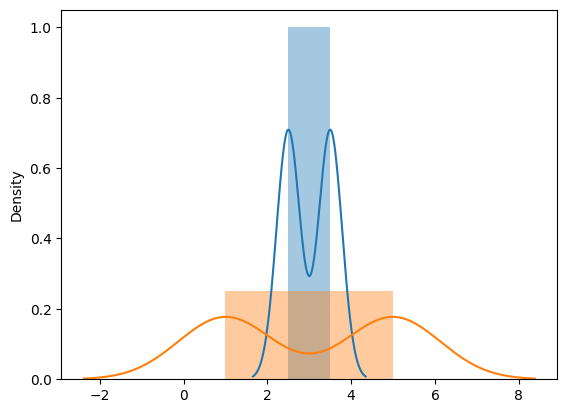

In [ ]:
sns.distplot(pelicula1)
sns.distplot(pelicula2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

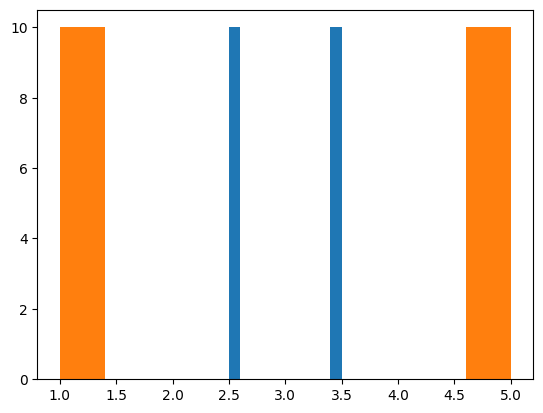

In [ ]:
plt.hist(pelicula1)
plt.hist(pelicula2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a48c3238a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7a48c3218d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a48c3238bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7a48c32188b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a48c3219f00>,
 'means': []}

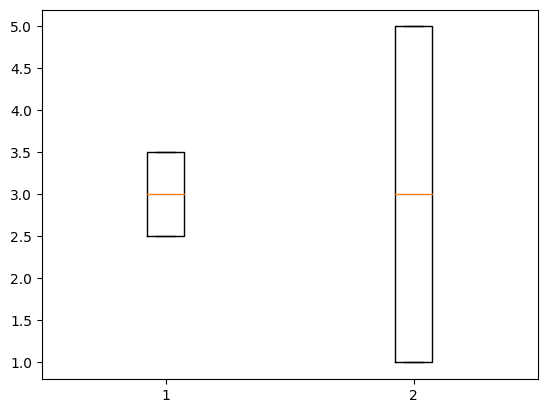

In [ ]:
plt.boxplot([pelicula1,pelicula2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a48c0cecb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7a48c0ced060>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a48c0cec880>,
 'medians': [<matplotlib.lines.Line2D at 0x7a48c0ced5a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a48c0ced840>,
 'means': []}

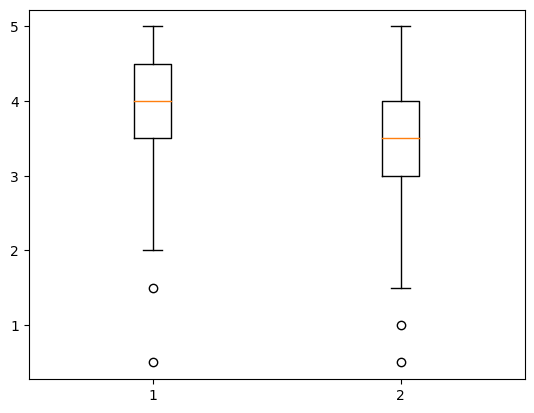

In [ ]:
plt.boxplot([notas_toy_story.nota,notas_jumanji.nota])

<Axes: xlabel='peliculaId', ylabel='nota'>

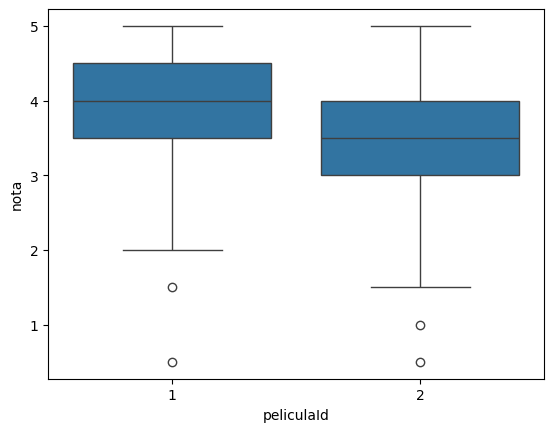

In [ ]:
sns.boxplot(x="peliculaId", y="nota", data=notas.query('peliculaId in (1,2)'))

<Axes: xlabel='peliculaId', ylabel='nota'>

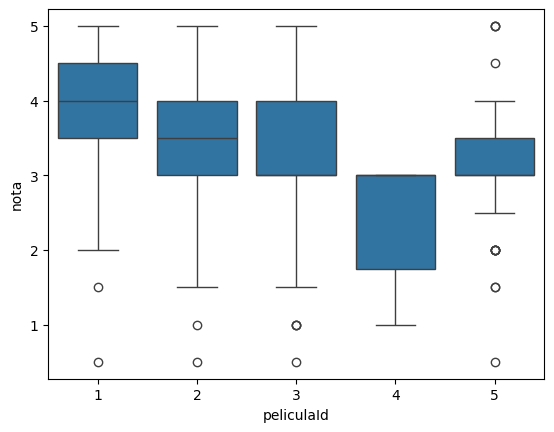

In [ ]:
sns.boxplot(x="peliculaId", y="nota",
            data=notas.query('peliculaId in (1,2,3,4,5)'))

In [ ]:
print("La desviación estándar de Toy Story es %.2f" %notas_toy_story.nota.std())
print("La desviación estándar de Jumanji es %.2f" %notas_jumanji.nota.std())

La desviación estándar de Toy Story es 0.83
La desviación estándar de Jumanji es 0.88


In [ ]:
print(pelicula1.mean(),pelicula2.mean())
print(np.median(pelicula1),np.median(pelicula2))
print(np.std(pelicula1),np.std(pelicula2))

3.0 3.0
3.0 3.0
0.5 2.0




---



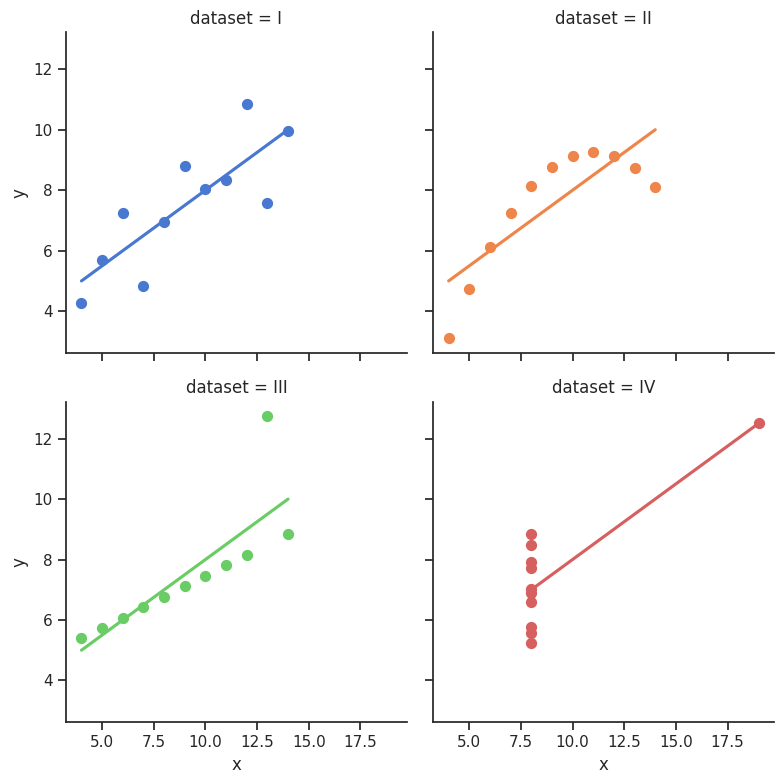

In [ ]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

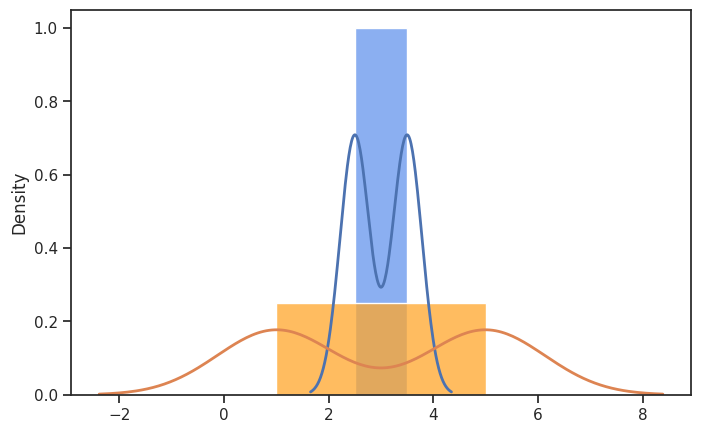

In [ ]:
plt.figure(figsize = (8, 5))
sns.histplot(pelicula1, stat = 'density', bins = 1, color = 'cornflowerblue')
sns.histplot(pelicula2, stat = 'density', bins = 1, color = 'xkcd:mango')
sns.kdeplot(pelicula1, linewidth = 2)
sns.kdeplot(pelicula2, linewidth = 2);
